In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Preprocessing

In [54]:
data = pd.read_csv("bank-additional-full.csv",sep=';', na_values='unknown')
data_backup = pd.read_csv("bank-additional-full.csv",sep=';', na_values='unknown')

In [55]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Handling Missing Values

In [57]:
# Check for null values
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [58]:
null_values = data.isnull().sum()
print(null_values[null_values > 0])

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


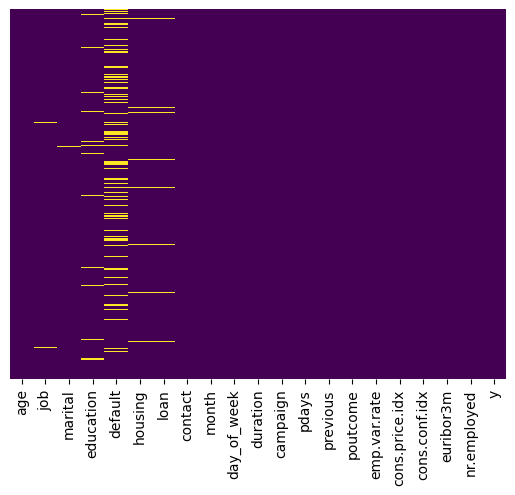

In [59]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [60]:
for i in null_values[null_values > 0].index:
    print(f"Unique values in column {i} : {data[i].unique()}")

Unique values in column job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Unique values in column marital : ['married' 'single' 'divorced' nan]
Unique values in column education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Unique values in column default : ['no' nan 'yes']
Unique values in column housing : ['no' 'yes' nan]
Unique values in column loan : ['no' 'yes' nan]


In [10]:
for i in null_values[null_values > 0].index:
    print(f"Value counts for column {i}:\n{data[i].value_counts()}")

Value counts for column job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64
Value counts for column marital:
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64
Value counts for column education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64
Value counts for column default:
default
no     32588
yes        3
Name: count, dtype: int64
Value counts for column housing:
housing
yes    21576
no     18622
Name: count, dtype: int64
Value counts for column loan:
loan
no     33950
yes     6248
Name: count, dtype: int64


Dropping default as it has 100% class imbalance

In [61]:
# Dropping the 'default' column as it dosn't have any useful information
data.drop('default', axis=1, inplace=True)

In [62]:
# Print the null values of 'housing' and 'loan' columns
print(data['housing'].isnull().sum())
print(data['loan'].isnull().sum())

990
990


In [63]:
# Since the housing column does not have much imbalance in the row we fill the null values with the mode
data['housing'] = data['housing'].fillna(data['housing'].mode()[0])

In [64]:
# Since the loan column have imbalance in the row we drop the rows with null values
data.dropna(subset=['loan'], inplace=True)

In [66]:
# Check for null values
data.isnull().sum()

age                  0
job                325
marital             79
education         1691
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [67]:
# Categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

In [68]:
# Printing the unique values in the categorical columns
for col in cat_cols:
    print(f"Unique values in column {col} : {data[col].unique()}")

Unique values in column job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Unique values in column marital : ['married' 'single' 'divorced' nan]
Unique values in column education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Unique values in column housing : ['no' 'yes']
Unique values in column loan : ['no' 'yes']
Unique values in column contact : ['telephone' 'cellular']
Unique values in column month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in column day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in column poutcome : ['nonexistent' 'failure' 'success']
Unique values in column y : ['no' 'yes']


## Fill null values of job, marital, education with their mode

In [69]:
data['job'] = data['job'].fillna(data['job'].mode()[0])
data['marital'] = data['marital'].fillna(data['marital'].mode()[0])
data['education'] = data['education'].fillna(data['education'].mode()[0])

data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Univariate Analysis

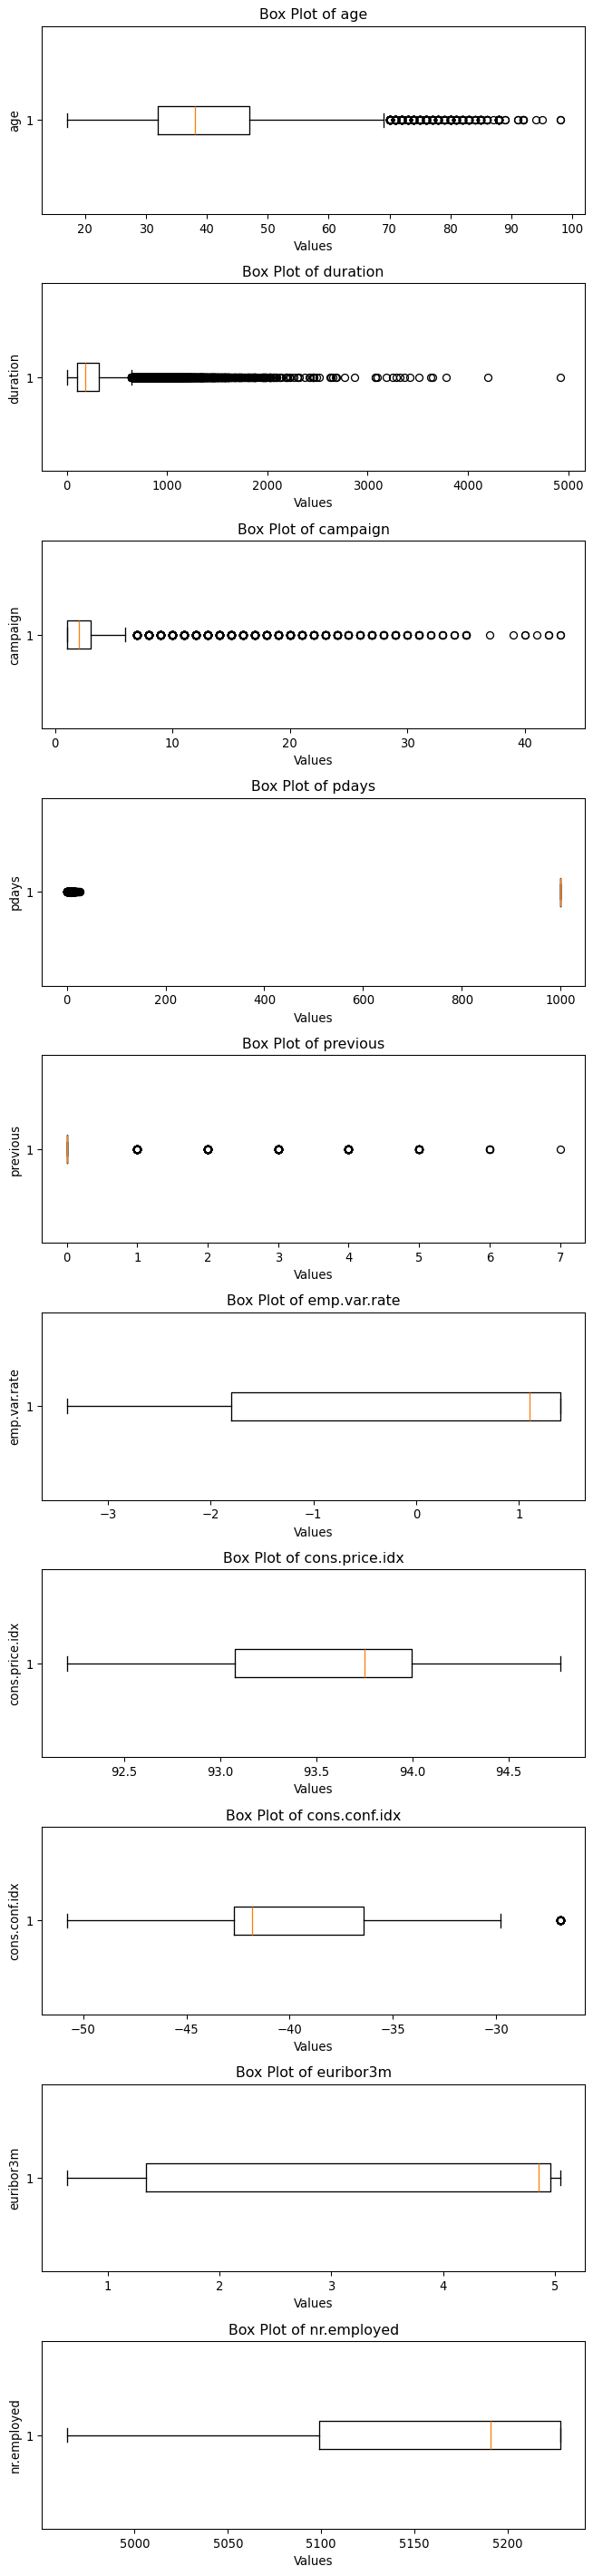

In [70]:
# Create subplots for numerical columns
fig, axs = plt.subplots(len(num_cols), 1, dpi=95, figsize=(7, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    axs[i].boxplot(data[col].dropna(), vert=False)  # Drop NaN values for box plot
    axs[i].set_title(f"Box Plot of {col}")
    axs[i].set_xlabel("Values")
    axs[i].set_ylabel(col)

# Adjust layout and display the plot for numerical columns
plt.tight_layout()
plt.show()

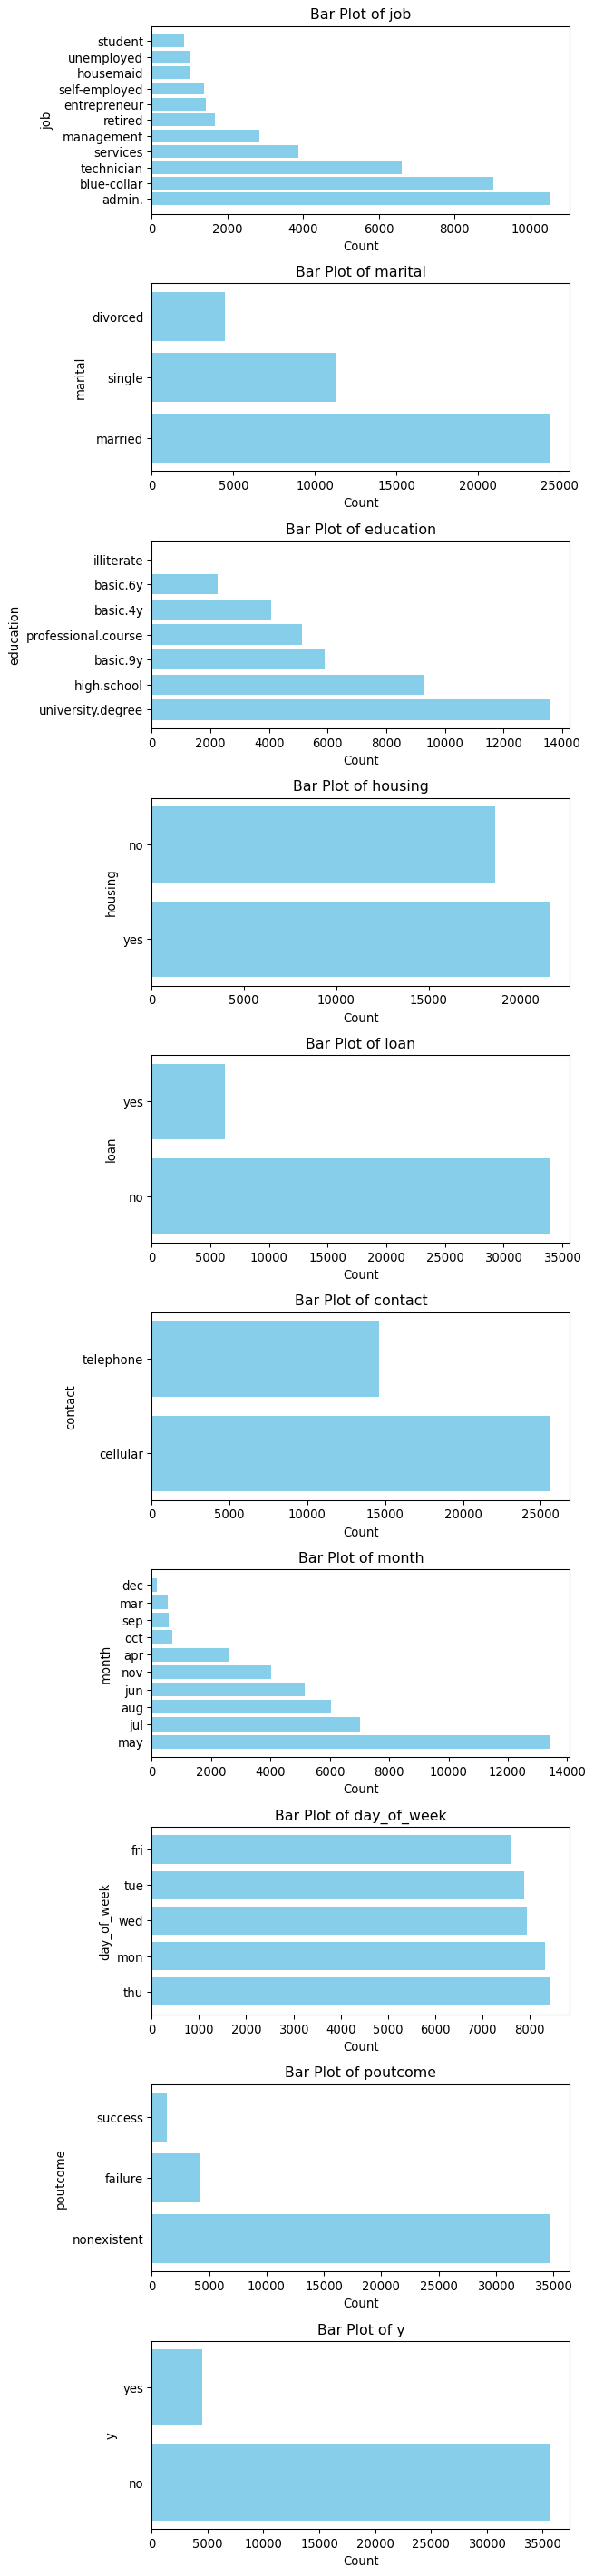

In [71]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns

# ----- Plot Categorical Columns (Bar Plots) -----
# Create subplots for categorical columns
fig, axs = plt.subplots(len(categorical_cols), 1, dpi=95, figsize=(7, len(categorical_cols) * 3))

for i, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts()
    axs[i].barh(value_counts.index, value_counts.values, color='skyblue')
    axs[i].set_title(f"Bar Plot of {col}")
    axs[i].set_xlabel("Count")
    axs[i].set_ylabel(col)

# Adjust layout and display the plot for categorical columns
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

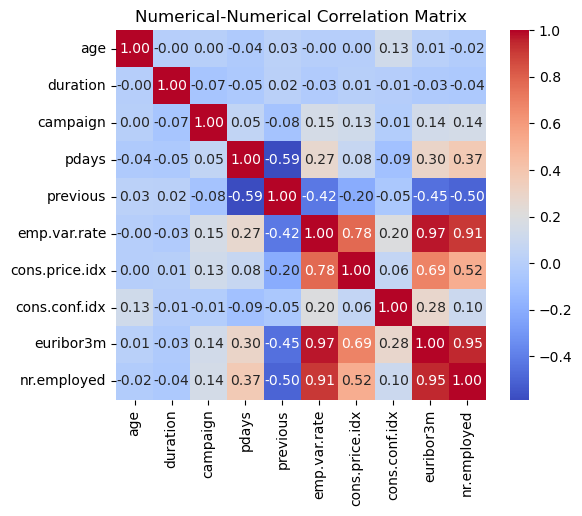

In [72]:
# Select only numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix_numerical = data[numerical_cols].corr()

# Plot heatmap
sns.heatmap(correlation_matrix_numerical, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Numerical-Numerical Correlation Matrix')
plt.show()

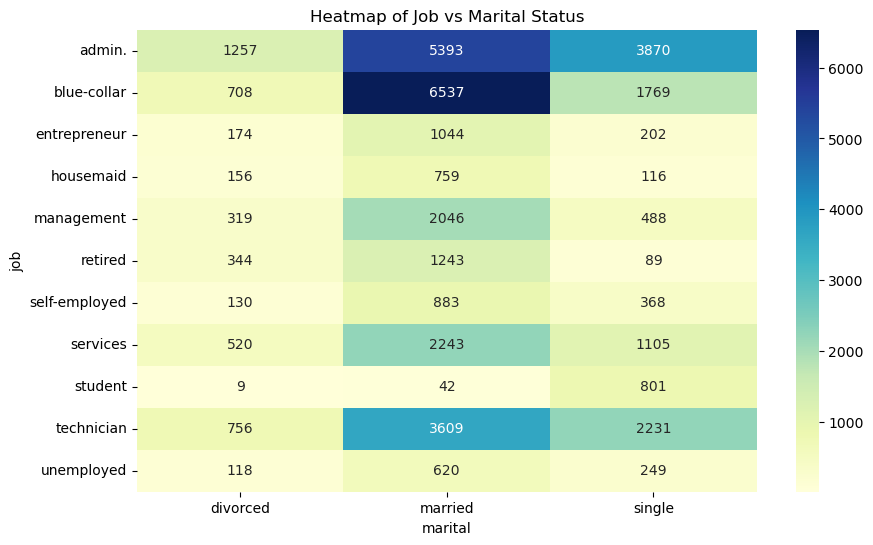

In [73]:
# Categorical-Categorical: Heatmap to visualize interaction between 'job' and 'marital'
cross_tab = pd.crosstab(data['job'], data['marital'])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Job vs Marital Status")
plt.show()

### Label encoding education

In [74]:
data["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [75]:
# Define the mapping in the desired ascending order
education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'university.degree': 5,
    'professional.course': 6
}

# Apply the mapping to the 'education' column
data['education'] = data['education'].map(education_mapping)
data_backup['education'] = data_backup['education'].map(education_mapping)
data.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30738,47,management,married,5,no,no,cellular,may,tue,242,1,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,no
2746,53,services,married,4,yes,no,telephone,may,wed,80,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
26682,46,admin.,married,4,yes,no,cellular,nov,thu,790,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4167,52,services,divorced,4,no,no,telephone,may,mon,579,5,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,yes
16119,31,admin.,single,5,yes,no,cellular,jul,tue,89,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [76]:
data["education"].unique()

array([1, 4, 2, 3, 6, 5, 0])

In [77]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# One-hot encoding for the remaining categorical columns
cat_cols = ['job', 'marital', 'housing', 'loan', 'contact',
            'month', 'day_of_week', 'poutcome', 'y']  # Assuming these are your categorical columns

data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_backup = pd.get_dummies(data_backup, columns=cat_cols, drop_first=True)

data.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,True,False,False
1,57,4,149,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,True,False,False
2,37,4,226,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,True,False,False
3,40,2,151,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,True,False,False
4,56,4,307,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,True,False,False


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   40198 non-null  int64  
 1   education             40198 non-null  int64  
 2   duration              40198 non-null  int64  
 3   campaign              40198 non-null  int64  
 4   pdays                 40198 non-null  int64  
 5   previous              40198 non-null  int64  
 6   emp.var.rate          40198 non-null  float64
 7   cons.price.idx        40198 non-null  float64
 8   cons.conf.idx         40198 non-null  float64
 9   euribor3m             40198 non-null  float64
 10  nr.employed           40198 non-null  float64
 11  job_blue-collar       40198 non-null  bool   
 12  job_entrepreneur      40198 non-null  bool   
 13  job_housemaid         40198 non-null  bool   
 14  job_management        40198 non-null  bool   
 15  job_retired           40

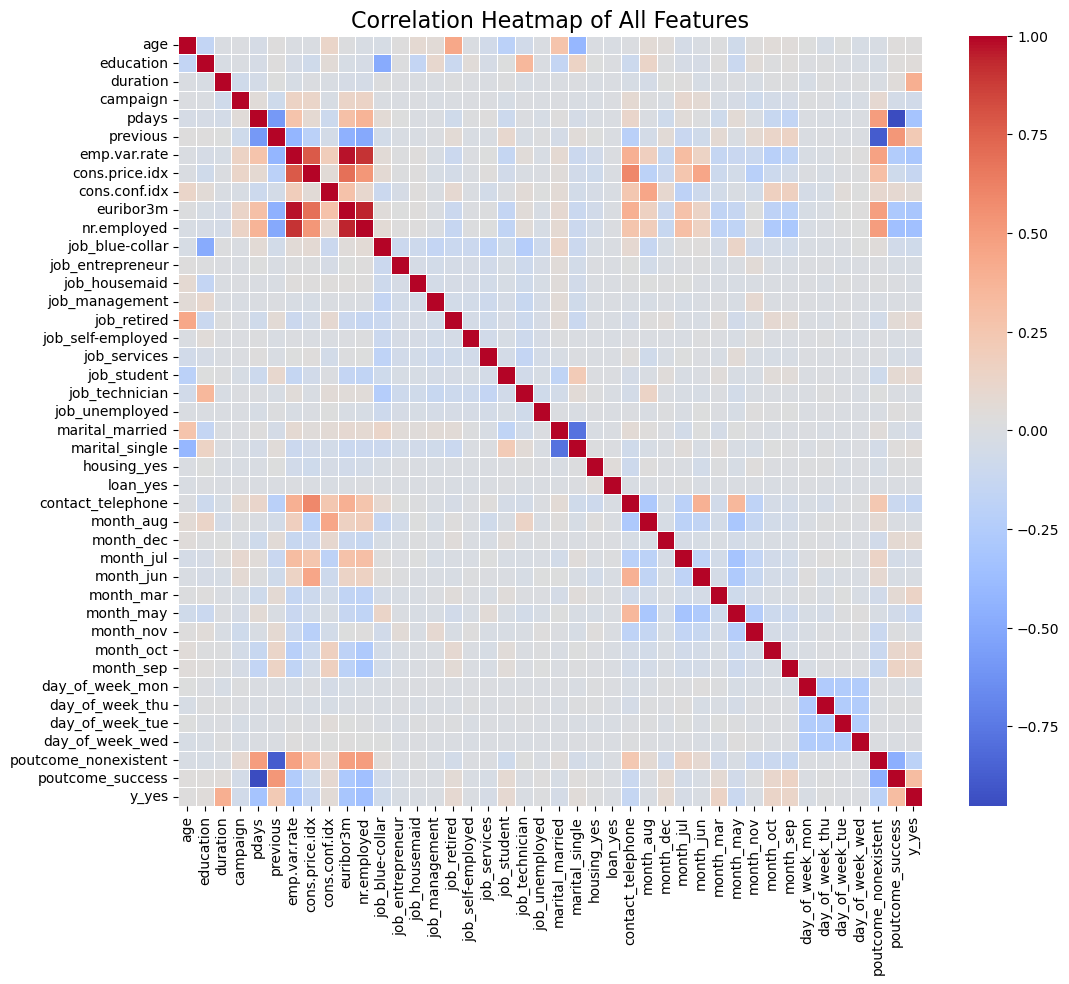

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Features", size=16)
plt.show()

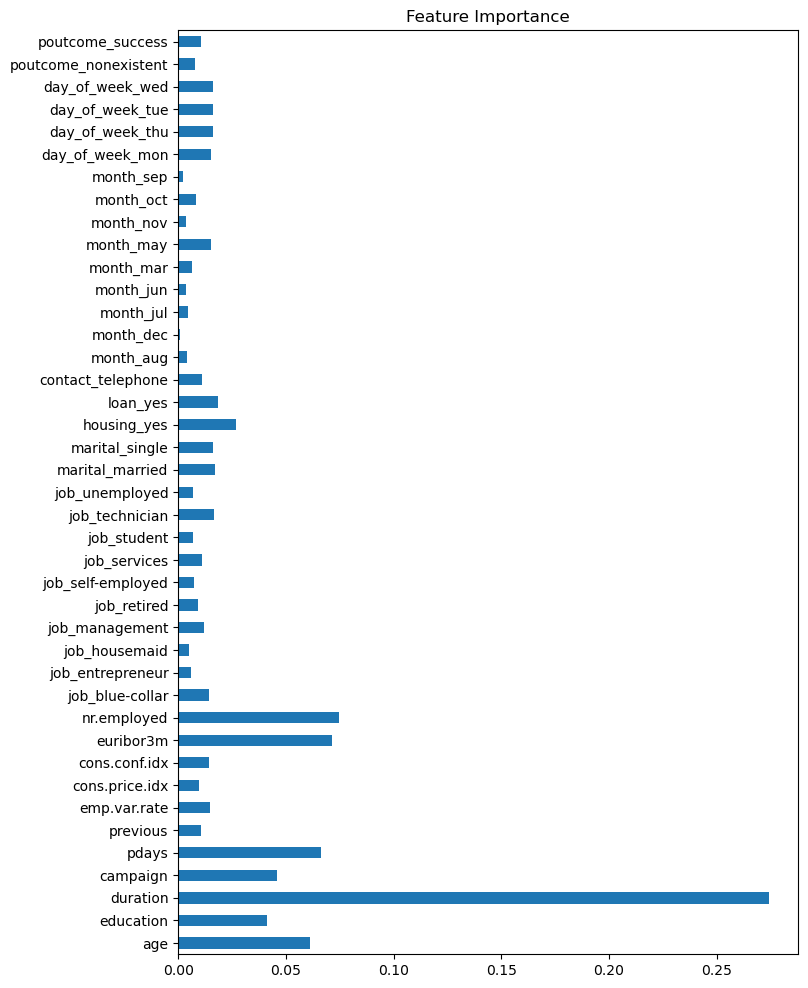

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
X = data.drop('y_yes', axis=1)
y = data['y_yes']

model = ExtraTreesRegressor()
model.fit(X, y)
plt.figure(figsize=(8, 12))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

plt.title("Feature Importance")
plt.show()

In [79]:
# Function to remove outliers using IQR technique
def remove_outliers(df, columns):
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df_cleaned = df.copy(deep=True)

    for column in columns:
        # Check if the column exists in the df
        if column in df_cleaned.columns:
            # Identify the quartiles
            q1, q3 = np.percentile(df_cleaned[column], [25, 75])
            # Calculate the interquartile range
            iqr = q3 - q1
            # Calculate the lower and upper bounds
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            # Drop the outliers
            df_cleaned = df_cleaned[~((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound))]
        # if a column is not found in the df, display a warning message
        else:
            print(f"Warning: Column {column} not found in DataFrame.")

    return df_cleaned

In [80]:
columns_of_concern = ["age", "cons.conf.idx"]

In [81]:
data = remove_outliers(data, columns_of_concern)
data.shape

(39356, 42)

### Log transformation on duration and campaign

In [82]:
# Step 2: Apply log transformation to the actual columns in the dataset
data['duration_log'] = np.log(data['duration'] + 1)
data['campaign_log'] = np.log(data['campaign'] + 1)

# Verify the transformation
print(data[['duration', 'campaign']].head())

   duration  campaign
0       261         1
1       149         1
2       226         1
3       151         1
4       307         1


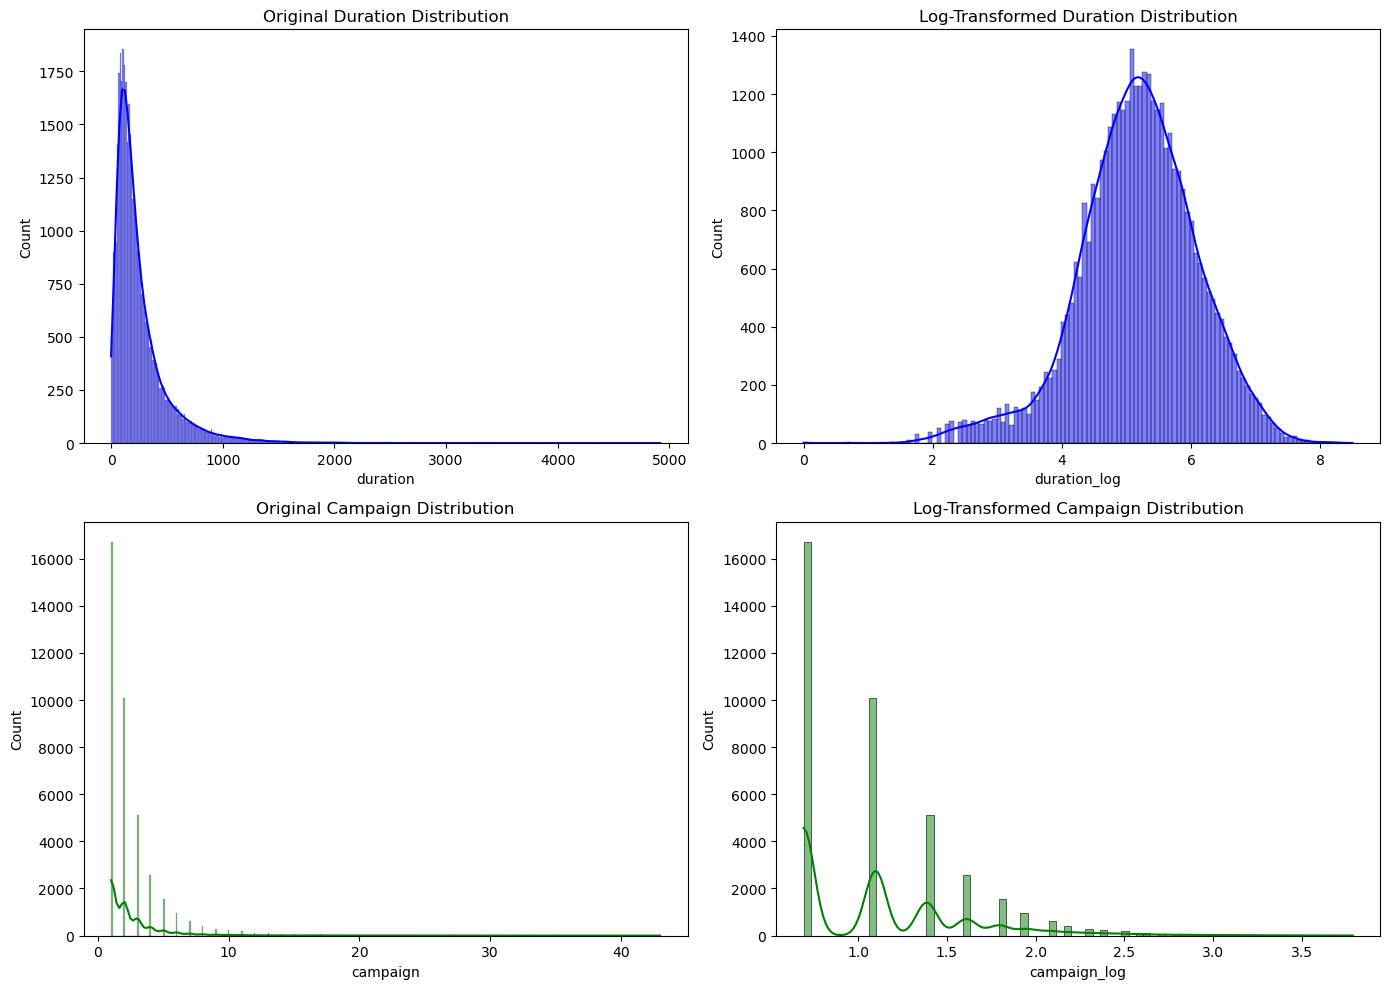

In [83]:
# Plot original vs log-transformed distributions for 'duration' and 'campaign'
plt.figure(figsize=(14, 10))

# 1. Plot original 'duration'
plt.subplot(2, 2, 1)
sns.histplot(data['duration'], kde=True, color='blue')
plt.title('Original Duration Distribution')

# 2. Plot log-transformed 'duration_log'
plt.subplot(2, 2, 2)
sns.histplot(data['duration_log'], kde=True, color='blue')
plt.title('Log-Transformed Duration Distribution')

# 3. Plot original 'campaign'
plt.subplot(2, 2, 3)
sns.histplot(data['campaign'], kde=True, color='green')
plt.title('Original Campaign Distribution')

# 4. Plot log-transformed 'campaign_log'
plt.subplot(2, 2, 4)
sns.histplot(data['campaign_log'], kde=True, color='green')
plt.title('Log-Transformed Campaign Distribution')

# Display the plots
plt.tight_layout()
plt.show()


In [84]:
# Drop the original 'duration' and 'campaign' columns
data['duration']=data['duration_log']
data = data.drop(columns=['duration_log', 'campaign_log'])
# Verify the updated DataFrame
print(data.head())

   age  education  duration  campaign  pdays  previous  emp.var.rate  \
0   56          1  5.568345         1    999         0           1.1   
1   57          4  5.010635         1    999         0           1.1   
2   37          4  5.424950         1    999         0           1.1   
3   40          2  5.023881         1    999         0           1.1   
4   56          4  5.730100         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  month_nov  month_oct  \
0          93.994          -36.4      4.857  ...      False      False   
1          93.994          -36.4      4.857  ...      False      False   
2          93.994          -36.4      4.857  ...      False      False   
3          93.994          -36.4      4.857  ...      False      False   
4          93.994          -36.4      4.857  ...      False      False   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False             True            False         

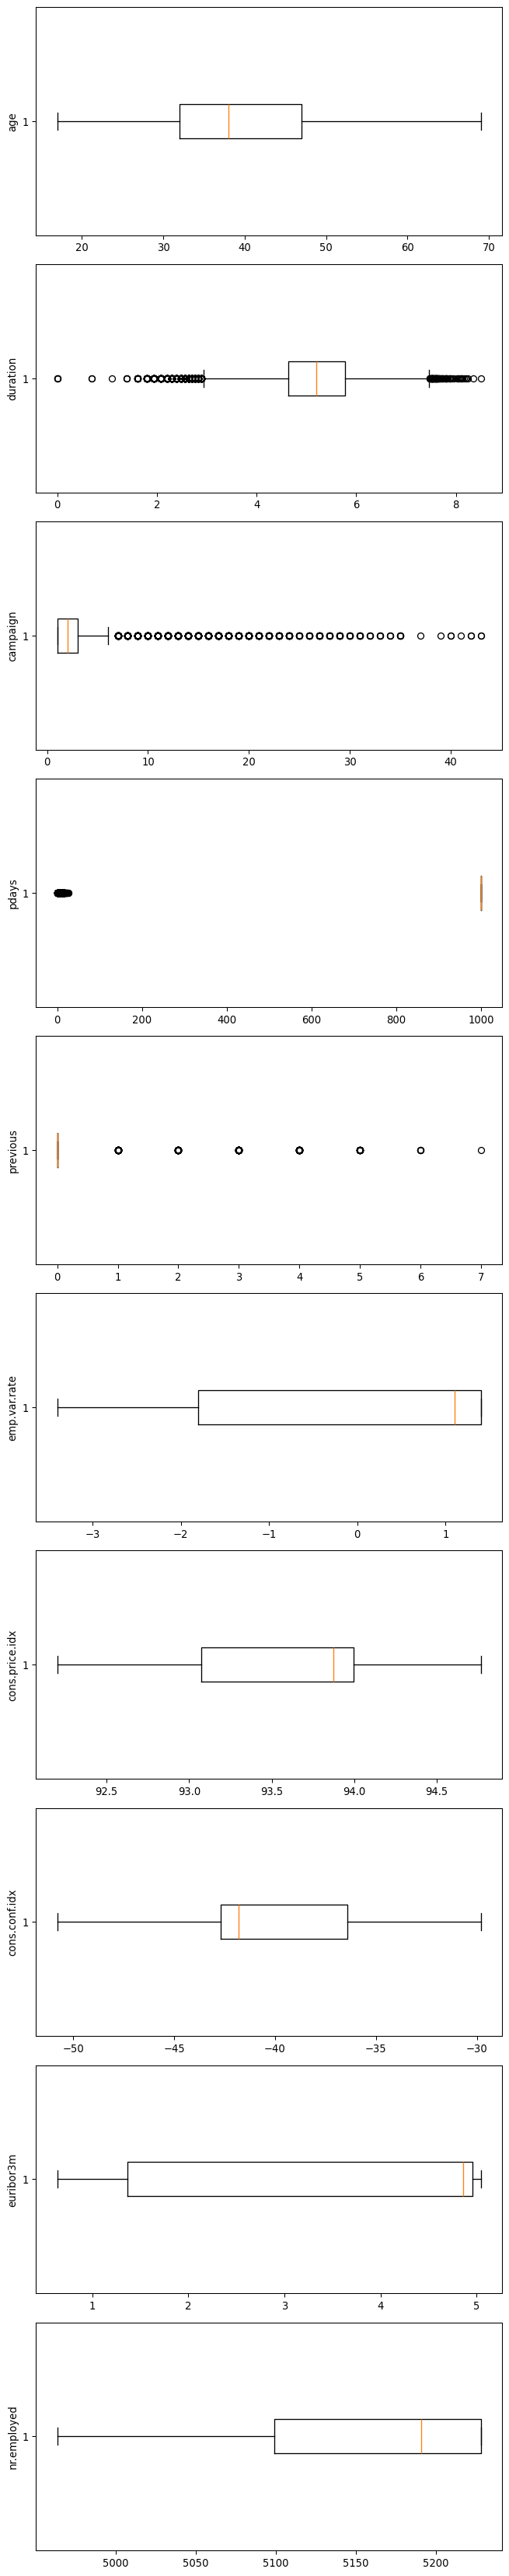

In [85]:
# Plot box plots for each column
fig, axs = plt.subplots(len(num_cols),1,dpi=95, figsize=(7,35))

# Iterate through numerical columns and create a box plot for each
for i, col in enumerate(num_cols):
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

### Splitting the data into train and test splits and applying MinMax Scaling

In [86]:
X = data.drop(columns="y_yes")
X.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,5.568345,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
1,57,4,5.010635,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
2,37,4,5.424950,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
3,40,2,5.023881,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
4,56,4,5.730100,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False


In [87]:
Y = data["y_yes"]
Y.head()

0    False
1    False
2    False
3    False
4    False
Name: y_yes, dtype: bool

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=10)

x_train.shape

(31484, 41)

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler().fit(x_train[num_cols])

# Normalize only the numerical features
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

#### Appling smotenc to the training data
Explanation:
SMOTENC allows you to specify which columns are categorical (in this case, one-hot encoded boolean columns).
It will then handle oversampling by interpolating between the continuous (numerical) features and duplicating or slightly adjusting the categorical ones (without introducing fractional values).
By using SMOTENC, you ensure that one-hot encoded columns are treated properly, and the synthetic data remains realistic.

In [90]:
from imblearn.over_sampling import SMOTENC
categorical_features = [i for i, col in enumerate(x_train.columns) if x_train[col].dtype == 'bool']
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(x_train, y_train)

### Sparisity checking in the data set

In [91]:
X_train_resampled_np = X_train_resampled.values if isinstance(X_train_resampled, pd.DataFrame) else X_train_resampled
num_zero_values = np.sum(X_train_resampled_np == 0)
total_elements = X_train_resampled_np.size
zero_proportion = num_zero_values / total_elements
print(f"Proportion of zero values: {zero_proportion:.4f}")


Proportion of zero values: 0.6414


# Logistic Regression

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [93]:
# Create a copy of the data to ensure we don't modify the original
X_train_resampled_copy = X_train_resampled.copy()
y_train_resampled_copy = y_train_resampled.copy()
x_test_copy = x_test.copy()

In [42]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 5,10],         # Regularization strength (adjusted range)
    'penalty': ['l1', 'l2'],             # Regularization type
    'max_iter': [20,50, 100],          # Max iterations (adjusted for faster convergence)
    'solver': ['saga'],                  # Use 'saga' for sparse data
    'tol': [1e-4,1e-5, 1e-6]                  # Tolerance for convergence
}

In [43]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

In [50]:
# Set up GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [47]:
# Fit the grid search to the resampled data
grid_search.fit(X_train_resampled_copy, y_train_resampled_copy)

/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/angadjeet22071

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'max_iter': [20, 50, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['saga'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring='accuracy')

In [48]:
# Print the best hyperparameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters found:  {'C': 1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Best cross-validation score: 0.9004


In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, classification_report

In [95]:
# best_params = grid_search.best_params_
logreg = LogisticRegression(C=1, 
                             penalty='l2', 
                             max_iter=50, 
                             solver='saga', 
                             tol=0.0001, 
                             warm_start=True)

In [96]:
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

# Fit the model incrementally and track accuracy and loss
for i in range(1, 50 + 1):
    logreg.max_iter = i  # Increment max_iter on each loop
    logreg.fit(X_train_resampled_copy, y_train_resampled_copy)
    
    # Track accuracy and loss after each iteration
    train_accuracy = accuracy_score(y_train_resampled_copy, logreg.predict(X_train_resampled_copy))
    test_accuracy = accuracy_score(y_test, logreg.predict(x_test_copy))

    train_loss = log_loss(y_train_resampled_copy, logreg.predict_proba(X_train_resampled_copy))
    test_loss = log_loss(y_test, logreg.predict_proba(x_test_copy))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

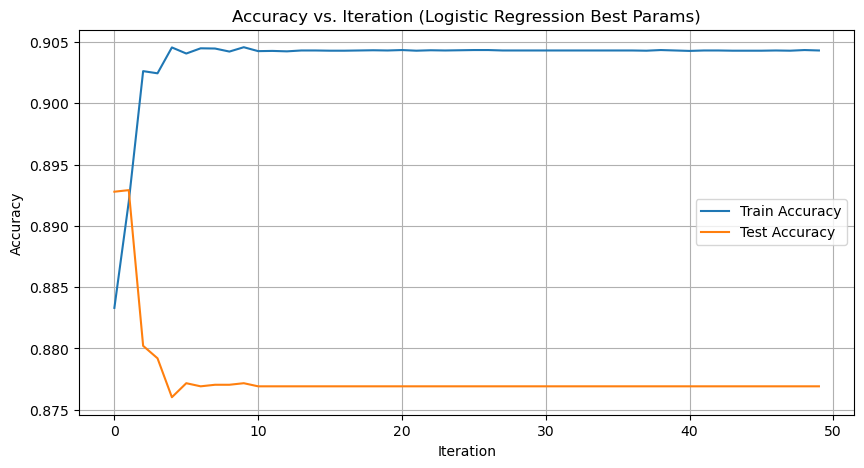

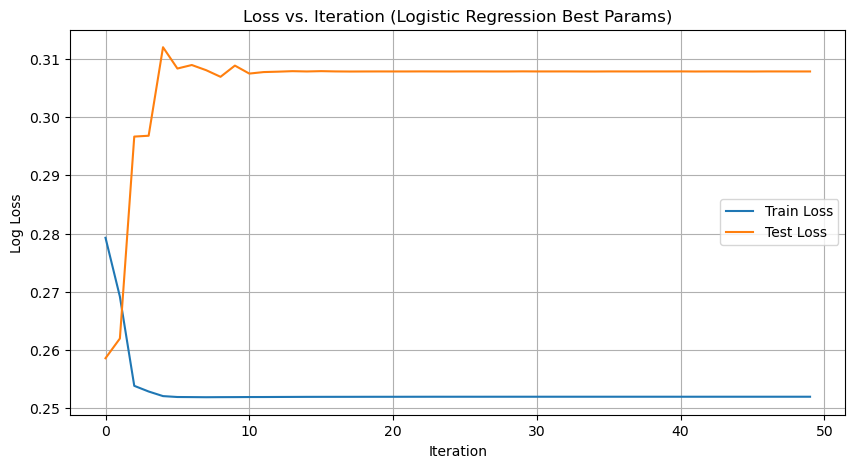

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.89      0.93      7006
        True       0.47      0.81      0.59       866

    accuracy                           0.88      7872
   macro avg       0.72      0.85      0.76      7872
weighted avg       0.92      0.88      0.89      7872

Accuracy: 0.8769
Precision: 0.4657
Recall: 0.8083
F1-Score: 0.5910
Log Loss: 0.3079
AUC: 0.9251


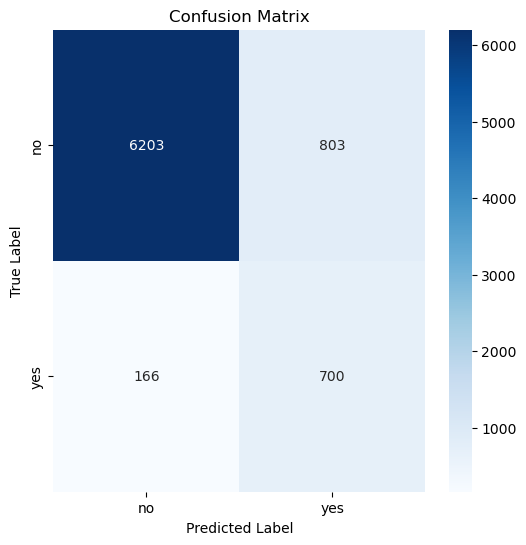

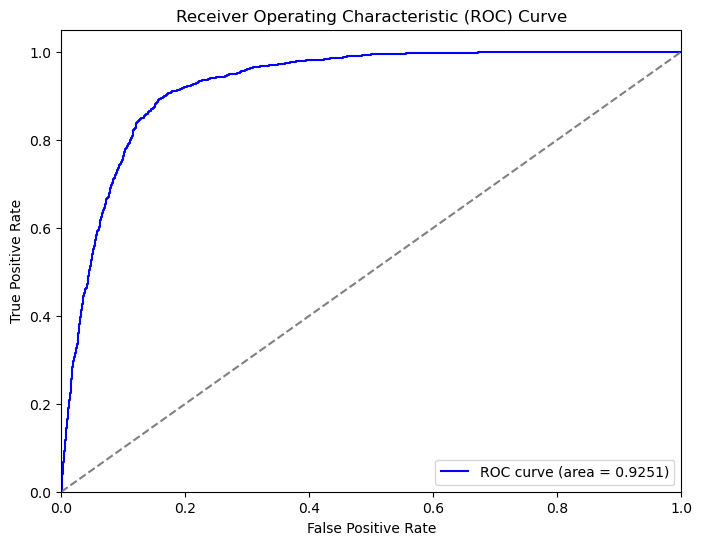

In [97]:
# Plot accuracy vs. iteration
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy vs. Iteration (Logistic Regression Best Params)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot loss vs. iteration
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss vs. Iteration (Logistic Regression Best Params)')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# After training the model, predict on the test data
y_pred = logreg.predict(x_test_copy)
y_prob = logreg.predict_proba(x_test_copy)[:, 1]  # Probabilities for positive class

# Calculate Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred,)

# Calculate Log Loss
logloss = log_loss(y_test, y_prob)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Simplified parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],         # Number of trees
    'max_depth': [10, 20, 30, None],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],         # Minimum samples for split
    'min_samples_leaf': [1, 2, 4],           # Minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2'],# Maximum number of features
    'bootstrap': [True, False]               # Whether to use bootstrap sampling
}

In [55]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [100]:
best_rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100
)

best_rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(bootstrap=False, max_features='log2')

In [103]:
y_pred = best_rf_model.predict(x_test)

In [104]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9078


In [106]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95      7006
        True       0.58      0.59      0.58       866

    accuracy                           0.91      7872
   macro avg       0.76      0.77      0.77      7872
weighted avg       0.91      0.91      0.91      7872



In [107]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

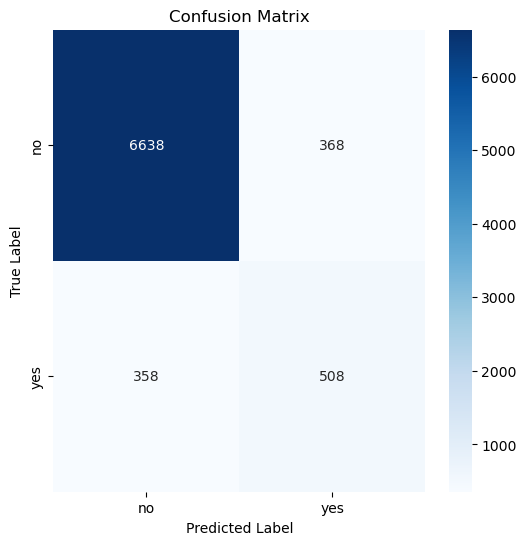

In [108]:
# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

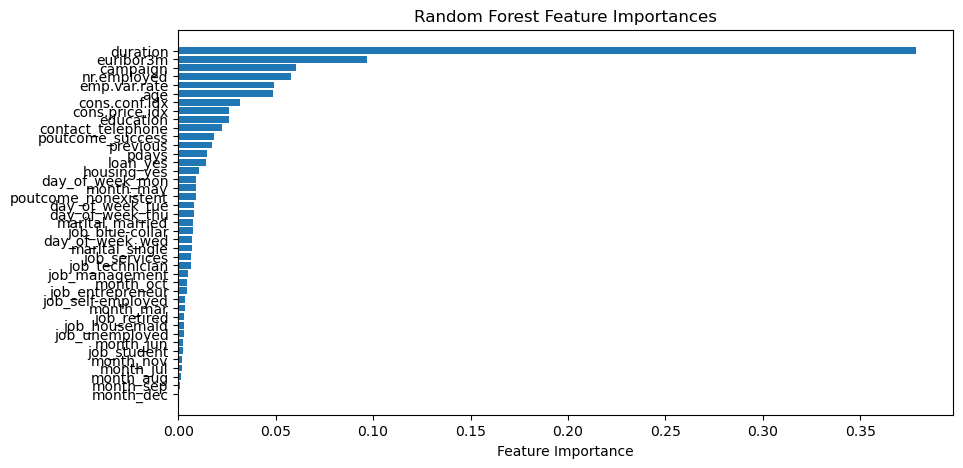

In [109]:
# Feature Importance Plot
importances = best_rf_model.feature_importances_
indices = importances.argsort()
feature_names = X_train_resampled.columns
plt.figure(figsize=(10, 5))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])  # Display feature names
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

# XGBoost

In [116]:
import xgboost as xgb

In [111]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],       # Number of boosting rounds
    'max_depth': [3, 6, 10],               # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate
    'subsample': [0.8, 0.9, 1.0],          # Fraction of samples used for fitting trees
    'colsample_bytree': [0.8, 0.9, 1.0]    # Fraction of features to be used for fitting each tree
}

In [ ]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   2.2s
[CV] END

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [66]:
# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.9}


In [121]:
best_xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=10,
    n_estimators=100,
    subsample=0.9,
    random_state=42
)
best_xgb_model.fit(X_train_resampled_copy,y_train_resampled_copy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [122]:
# Predict on the test data
y_pred = best_xgb_model.predict(x_test)

In [123]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9098


In [124]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.94      0.95      7006
        True       0.58      0.67      0.62       866

    accuracy                           0.91      7872
   macro avg       0.77      0.80      0.78      7872
weighted avg       0.92      0.91      0.91      7872



In [125]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

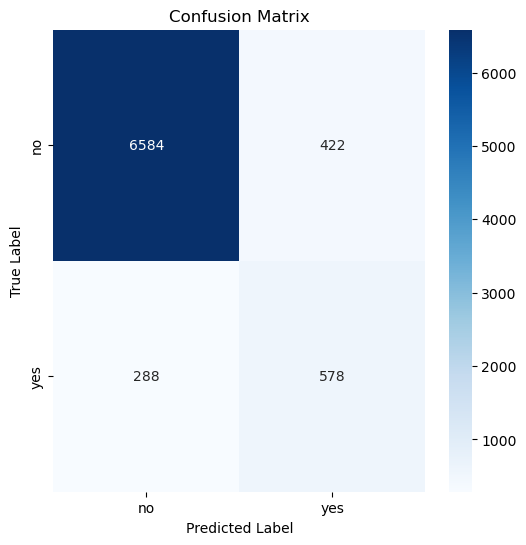

In [126]:
# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

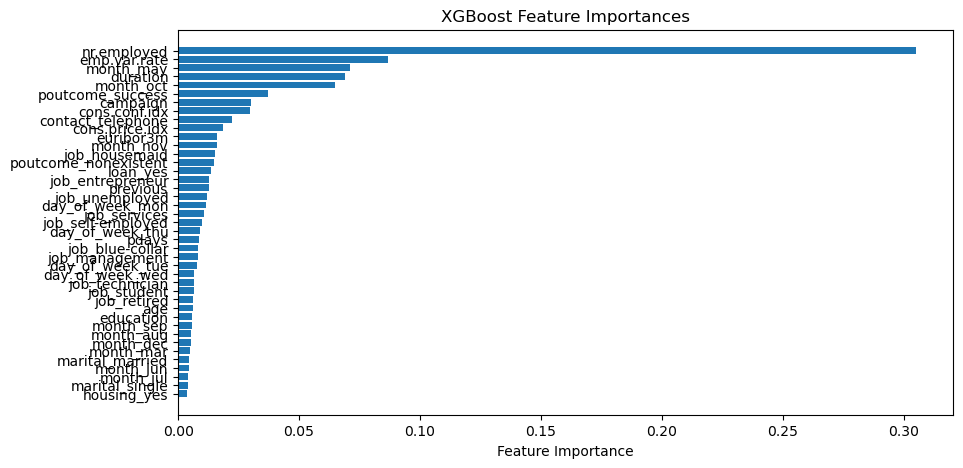

In [ ]:
# Feature Importance Plot
importances = best_xgb_model.feature_importances_
indices = importances.argsort()

# Get the actual feature names from the DataFrame columns
feature_names = X_train_resampled.columns

# Plot the Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])  # Display actual feature names
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.show()

# Multi-Layer Perceptron Model

In [128]:
from sklearn.neural_network import MLPClassifier
# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(64, 64, ), (128, 64, 64, 128, ), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [50, 100]
}

In [52]:
# Initialize MLP Classifier
mlp_model = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  34.5s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  34.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  34.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  34.7s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  35.2s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  35.4s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  36.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  36.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  37.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  38.7s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  37.9s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  38.7s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  38.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  39.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  40.2s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  40.5s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  40.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  41.5s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  41.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  42.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.5min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.5min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.6min
[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time=  57.2s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time=  57.5s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time=  57.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.1min
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time=  57.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  53.0s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time=  58.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time=  59.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time=  58.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time=  59.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  57.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  58.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  56.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  59.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.9min
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 2.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  38.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  37.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  36.6s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 2.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  37.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=adam; total time=  37.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  29.5s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  29.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  29.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  30.4s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=50, solver=sgd; total time=  34.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 2.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 2.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  36.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  32.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  32.4s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  32.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 3.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 3.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=adam; total time=  35.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 3.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  30.7s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  30.3s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  30.1s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  29.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  35.7s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 6.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 2.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 2.9min
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 2.8min
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 2.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.2min
[CV] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 3.2min
[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 6.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 6.9min
[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 6.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.5min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 6.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.8min
[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 7.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=50, solver=adam; total time= 1.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 6.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 6.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.6min
[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 7.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 7.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.1min
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.1min
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.8min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=50, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=adam; total time= 1.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=adam; total time= 3.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time= 1.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  57.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.5min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=constant, max_iter=100, solver=sgd; total time= 3.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  56.9s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=50, solver=sgd; total time=  58.8s


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 2.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 2.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 2.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 3.5min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 2.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=adam; total time= 2.1min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 2.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 2.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.9min
[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.2min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 1.9min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=100, solver=sgd; total time= 2.0min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 3.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 3.5min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=adam; total time= 3.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 64, 64, 128), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 3.3min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.7min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.6min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=adam; total time= 1.5min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.4min


/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angadjeet22071/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.4min
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=100, solver=sgd; total time= 1.4min


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(64, 64), (128, 64, 64, 128),
                                                (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100], 'solver': ['adam', 'sgd']},
             verbose=2)

## Using in build functions

In [53]:
# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
best_mlp_model = grid_search.best_estimator_

Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


In [127]:
best_mlp_model=MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100, 100),
    learning_rate='constant',
    max_iter=1,  # Only 1 iteration at a time
    solver='adam',
    warm_start=True,  # Retain weights and continue training
    random_state=42
)
best_mlp_model.fit(X_train_resampled_copy,y_train_resampled_copy)

NameError: name 'MLPClassifier' is not defined

In [ ]:
# Predict on the test data
y_pred = best_mlp_model.predict(x_test)

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8872


In [60]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.92      0.94      7223
        True       0.47      0.61      0.53       843

    accuracy                           0.89      8066
   macro avg       0.71      0.76      0.73      8066
weighted avg       0.90      0.89      0.89      8066



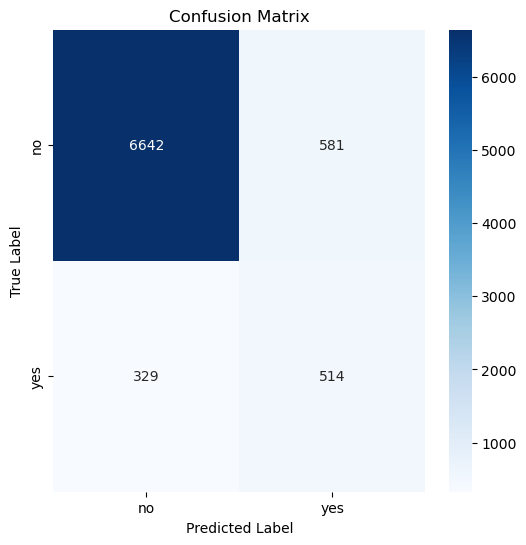

In [61]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

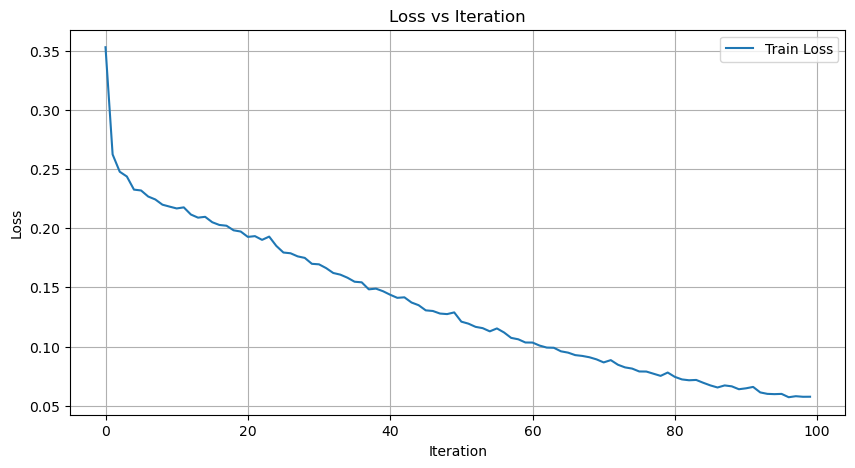

In [63]:
# Plot Accuracy and Loss vs Iteration
# Extract the training history (accuracy and loss)
train_accuracy = grid_search.best_estimator_.loss_curve_

# Plot Loss vs Iteration
train_loss = grid_search.best_estimator_.loss_curve_
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.title('Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## without in build function

In [130]:
from sklearn.utils import shuffle

In [131]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier with the specified parameters
mlp_model = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100, 100),
    learning_rate='constant',
    max_iter=100,
    solver='adam',
    random_state=42,
    warm_start=True
)

# Track metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

classes = np.unique(y_train_resampled)

# Train in epochs
for epoch in range(45):  
    X_train_shuffled, y_train_shuffled = shuffle(X_train_resampled, y_train_resampled, random_state=epoch)
    mlp_model.partial_fit(X_train_shuffled, y_train_shuffled, classes=classes)
    
    # Train metrics
    y_train_pred = mlp_model.predict(X_train_resampled)
    y_train_probs = mlp_model.predict_proba(X_train_resampled)
    train_accuracies.append(accuracy_score(y_train_resampled, y_train_pred))
    train_losses.append(log_loss(y_train_resampled, y_train_probs))
    
    # Test metrics
    y_test_pred = mlp_model.predict(x_test)
    y_test_probs = mlp_model.predict_proba(x_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    test_losses.append(log_loss(y_test, y_test_probs))


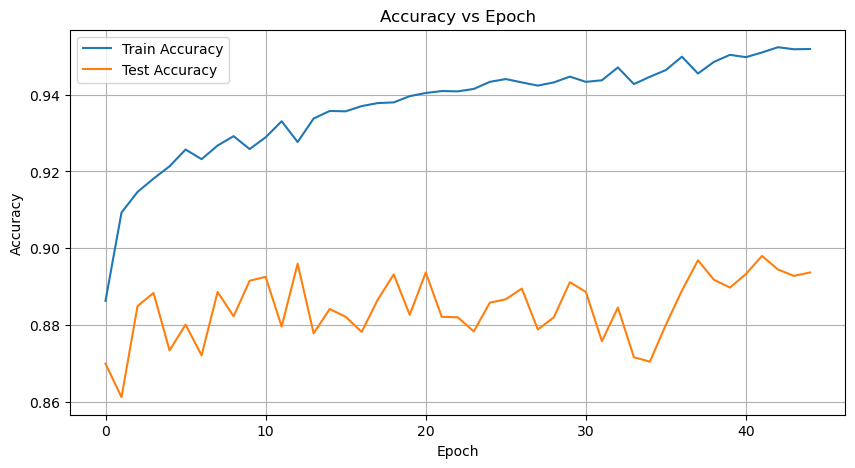

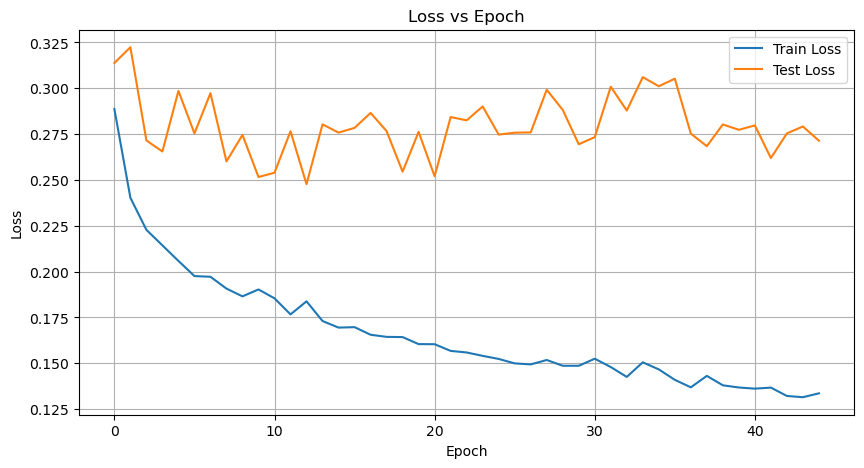

In [136]:
# Plot Train and Test Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot Train and Test Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()

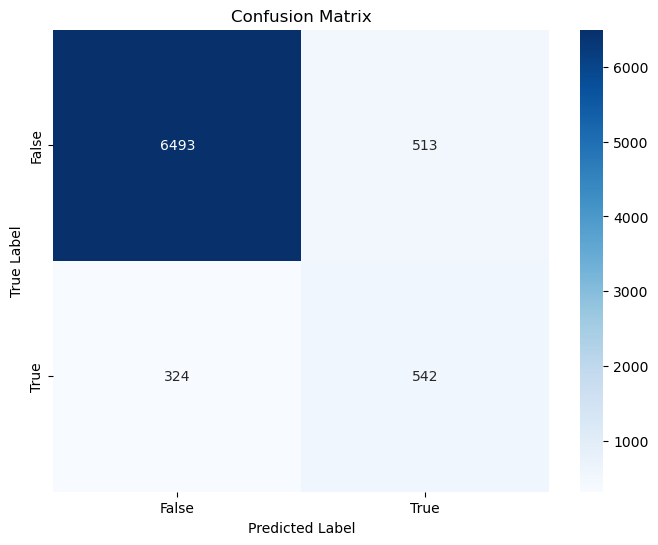

In [137]:

y_test_pred = mlp_model.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [138]:
# Generate predictions on the test set
y_test_pred = mlp_model.predict(x_test)

# Generate the classification report
report = classification_report(y_test, y_test_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      7006
        True       0.51      0.63      0.56       866

    accuracy                           0.89      7872
   macro avg       0.73      0.78      0.75      7872
weighted avg       0.90      0.89      0.90      7872



In [139]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8937
